#Пример проектной задачи: исследование падения тела с высоты

Рассматривается физический эксперимент по свободному падению тела, проведённый в Махасаракамском университете (Таиланд) в 2024 году. Материалы описаны в статье Improved Accuracy in Determining the Acceleration Due to Gravity in Free Fall Experiments Using Smartphones and Mechanical Switches (DOI: <a href="https://doi.org/10.3390/app14062632">10.3390/app14062632</a> ). Основная идея эксперимента заключается в определении значения ускорения свободного падения.

Установка включает штатив с зажимом, который расположен на лабораторном столе. Электромагнитный соленоид, закреплённый другим зажимом, подключён к переключателю через источник постоянного тока. Соленоид удерживает и затем отпускает стальной шарик диаметром 9.53 мм и массой 3.52 г.

В ходе эксперимента шарик закрепляют на разных высотах и отпускают для свободного вертикального падения, после чего он ударяется о поверхность. Время падения фиксируется с помощью микрофона смартфона и программного обеспечения, которое позволяет по звуку определить момент щелчка выключателя соленоида и момент удара шарика о поверхность.

Фотография стенда и схема представлена на картинке ниже.

<div>
<p align="center">
<img src="https://raw.githubusercontent.com/poluyan/msuode/refs/heads/main/exp1.png" width="800"/>
</p>
</div>

В статье представлены все необходимые сведения об эксперименте (адрес лаборатории, высота, температура и т.д.), а также приведены теоретические расчёты времени падения и усреднённые экспериментальные результаты.

Данные теоретических расчётов авторов и результаты эксперимента приведены в таблице ниже.

<table border="1" style="border-collapse: collapse; text-align: center;">
  <thead>
    <tr>
      <th>Высота (метр)</th>
      <th>Оценка (сек)</th>
      <th>Эксперимент (сек)</th>
      <th>Отклонение (s.d.)</th>
    </tr>
  </thead>
  <tbody>
    <tr><td>0.6</td><td>0.350</td><td>0.330</td><td>0.011</td></tr>
    <tr><td>0.8</td><td>0.404</td><td>0.392</td><td>0.005</td></tr>
    <tr><td>1.0</td><td>0.452</td><td>0.448</td><td>0.012</td></tr>
    <tr><td>1.2</td><td>0.495</td><td>0.482</td><td>0.002</td></tr>
    <tr><td>1.4</td><td>0.535</td><td>0.522</td><td>0.002</td></tr>
  </tbody>
</table>

# Постановка задачи

На основе второго закона Ньютона и с применением нескольких циклов математического моделирования рассмотрите падение шарика с использованием различных дифференциальных уравнений. Используя экспериментальные данные, приведённые в оригинальной статье, рассчитайте для каждой модели коэффициент детерминации $R^2$. **Какая из построенных моделей продемонстрировала наибольшее значение коэффициента $R^2$?**


# Решение


## Введение

Важно отметить, что коэффициент детерминации  $R^2$ в общем случае несимметричен. При вычислении в знаменателе стоит вариация истинных данных, то есть данных эксперимента. Следует уточнить известную зависимость по доступным в работе данным, поскольку авторы приводят только усредненные и округленные значения результатов эксперимента и теоретических оценок.

In [ ]:
import numpy as np
from sklearn.metrics import r2_score

times_exp = np.array([0.330, 0.392, 0.448, 0.482, 0.522]) # экспериментальные данные
times_thr = np.array([0.350, 0.404, 0.452, 0.495, 0.535]) # теоретическая оценка авторов

print(f"R² = {r2_score(times_exp, times_thr):.5f}")

R² = 0.96065


Ниже представлены три модели, каждая из которых уточняет описание эксперимента, рассмотренного в статье, с использованием цикла математического моделирования. В рамках постановки задачи рассматривается движение шарика от момента срабатывания выключателя соленоида до момента его падения, то есть моделируется только этап свободного падения шарика.

**Целью моделирования** является определение времени падения шарика при различных начальных высотах.

С точки зрения пирменения ДУ, задача сводится к поиску неизвестного закона (функции) изменения высоты шарика $h$ с течением времени $t$.

Очевидно, что основной силой, действующей на шарик, падающий вертикально вниз, является сила тяжести.

Поскольку в каждом эксперименте известно начальное расстояние, пройденное шариком, высоту его положения в любой момент времени можно определить как разность:
$$h(t) = h_{0} - s(t),$$
где $h_{0}$  — начальная высота, а $s(t)$ — путь, пройденный шариком к моменту времени $t$. Такое представление удобно, поскольку явно указывает, что сила тяжести направлена в сторону движения тела и, следовательно, имеет положительное значение в принятой системе координат.

Начальные условия для ДУ определяются из того, что в момент выключения соленоида скорость шарика и пройденный им путь равны нулю:
$$s(0)=0, \quad v(0) = 0.$$

## Модель 1


Составляем дифференциальное уравнение с использованием второго закона Ньютона $m \dfrac{dv}{dt}=F$, где $F$ это сумма всех приложенных к телу сил с учетом направления движения. Поскольку в первой модели рассматривается только одна сила — сила тяжести, а ускорение можно представить через пройденное расстояние
$$\dfrac{dv}{dt} = \dfrac{d^2s}{dt^2}$$

запишем начальную задачу в следующем виде

\begin{align}
\left\{
        \begin{array}{l}
        m \cdot s''(t)=m \cdot g,  \\
        s(0)=0,  \\
        s'(0)=0.
        \end{array}
        \right.
\end{align}

где $s(t)$ — функция, определяющая расстояние пройденное в момент времени $t$. В первой модели используется значение ускорения свободного падения $g$ = 9.81 м/с², принятое авторами статьи при проведении теоретических расчётов.

*Следует отметить, что на данном этапе формулировка модели (см. файл Цикл моделирования) завершается, и начинается этап анализа и решения математической задачи.*

Поскольку в дальнейшем планируется усложнение модели, а использование пакета символьных вычислений станет затруднительным, для численного решения задачи применим метод Рунге–Кутты восьмого порядка (DOP853), реализованный в пакете `SciPy`.

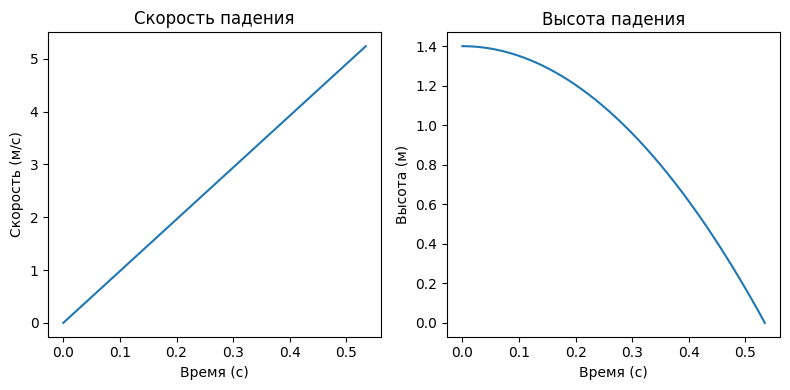

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from math import pi

# Константы
m = 0.00352   # кг, масса шарика
g0 = 9.81     # м/с², используется для теоретической оценки в статье

# Функция правых частей ДУ (модель 1)
# ДУ второго порядка рассматривается как система ДУ
# см. пример https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html
def deriv1(t, y):
    v, s = y
    dvdt = g0
    dsdt = v
    return [dvdt, dsdt]

# Событие: достигли заданной высоты (прошли заданное расстояние)
def make_event(h_target):
    def hit_ground(t, y):
        return y[1] - h_target
    hit_ground.terminal = True
    hit_ground.direction = 1
    return hit_ground

# Список высот в эксперименте
heights = [0.60, 0.80, 1.00, 1.20, 1.40]
times_model1 = []

# Считаем время падения для каждой высоты
for h in heights:
    sol1 = solve_ivp(deriv1, [0, 1], [0, 0], events=make_event(h), method='DOP853', max_step=0.001)
    if sol1.t_events[0].size > 0:
        times_model1.append(sol1.t_events[0][0])

# График скорости и высоты для последнего эксперимента
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(sol1.t, sol1.y[0])
plt.xlabel('Время (с)')
plt.ylabel('Скорость (м/с)')
plt.title('Скорость падения')

plt.subplot(1,2,2)
plt.plot(sol1.t, heights[-1] - sol1.y[1])
plt.xlabel('Время (с)')
plt.ylabel('Высота (м)')
plt.title('Высота падения')

plt.tight_layout()
plt.show()

Вычислим коэффициент детерминации $R^2$, полученный с помощью модели, и сравним его с данными из статьи.

Время падения (эксперимент):     [0.33  0.392 0.448 0.482 0.522]
Время падения (оценка авторов):  [0.35  0.404 0.452 0.495 0.535] R² = 0.96065
Время падения (модель 1):        [0.35  0.404 0.452 0.495 0.534] R² = 0.96265


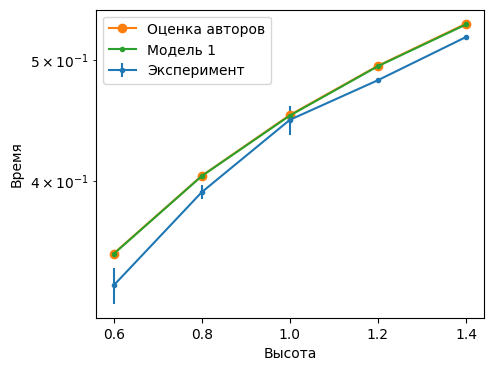

In [ ]:
print("Время падения (эксперимент):    ", times_exp)
print("Время падения (оценка авторов): ", times_thr, f"R² = {r2_score(times_exp, times_thr):.5f}")
print("Время падения (модель 1):       ", np.round(np.array(times_model1), 3), f"R² = {r2_score(times_exp, times_model1):.5f}")

exp_sd = np.array([0.011, 0.005, 0.012, 0.002, 0.002]) # стандартное отклонение (данные эксперимента)

plt.figure(figsize=(5,4))
plt.errorbar(heights, times_exp, yerr=exp_sd, fmt='.-', label='Эксперимент')
plt.plot(heights, times_thr, 'o-', label='Оценка авторов')
plt.plot(heights, times_model1, '.-', label='Модель 1')
plt.xlabel('Высота')
plt.ylabel('Время')
plt.xticks(heights)
plt.yscale('log')
plt.legend()
plt.show()

## Модель 2

Очевидно, что на падающий шарик действует также сила сопротивления воздуха (<a href="https://en.wikipedia.org/wiki/Drag_(physics)">лобовое сопротивление</a>), величина которой пропорциональна квадрату скорости движения с некоторым коэффициентом пропорциональности и направлена противоположно вектору скорости.

Поскольку форма и диаметр шарика известны, дополним модель и соответствующее дифференциальное уравнение указанной силой, которая выражается через <a href="https://en.wikipedia.org/wiki/Drag_(physics)#The_drag_equation">уравнение сопротивления</a>:
$${\displaystyle F_{d}\,=\,{\tfrac{1}{2}}\ \rho  \ C_{d} \ A \ v^{2}},$$
где
* $\rho$ — плотность среды (кг/м³),
* $C_d$ —  безразмерный <a href="https://en.wikipedia.org/wiki/Drag_coefficient">коэффициент сопротивления формы</a>,
* $A$ — площадь поперечного сечения шарика ($\pi d^2 / 4$).

В рассматриваемых экспериментах скорость шарика достигает порядка 5 м/с, при которой сопротивление воздуха создаёт относительно небольшую силу по сравнению с весом.

Перед добавлением этой силы в модель целесообразно оценить её величину. Например, вес шарика:
$$F_{g} = m g \approx 0.0345 \ N,$$
а сила сопротивления при постоянном коэффициенте формы $C_{d} = 0.47$ и стандартной плотности воздуха $\rho = 1.225$ кг/м³ составит:
$$F_{d} = 0.5 \times 1.225 \times 0.47 \times 7.133 \times  10^{-5} \times 5^2 \approx 5.13 \times 10^{-4}.$$

Отношение сил $F_{d}/F_{g} \approx 0.0148$, то есть около $1.5\%$. Хотя это значение невелико, оно уже даёт заметный вклад. При этом следует учитывать, что выбранное табличное значение $C_{d}$​ относится к диапазону средних скоростей и может быть некорректным для малых скоростей (<a href="https://en.wikipedia.org/wiki/Reynolds_number">число Рейнольдса</a>).

Запишем начальную задачу с учетом сопротивления воздуха.

\begin{align}
\left\{
        \begin{array}{l}
        \displaystyle \ddot s= g - \frac{\rho  \ C_{d} \ A \ \dot s^{2}}{2 \ m} ,  \\
        s(0)=0,  \\
        \dot s(0)=0.
        \end{array}
        \right.
\end{align}

Численно решим ДУ и вычислим коэффициент детерминации.

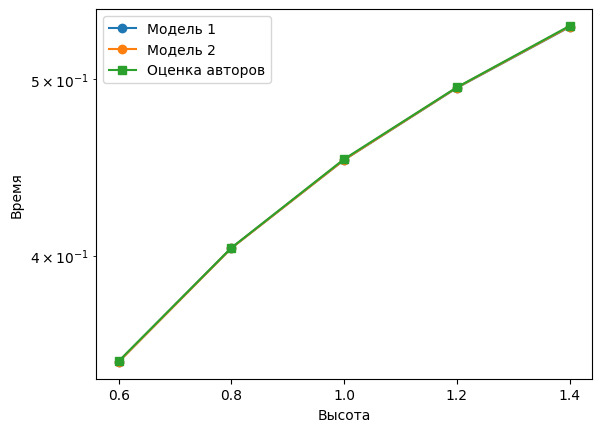

Время падения (оценка авторов):  [0.35  0.404 0.452 0.495 0.535] R² = 0.96065
Время падения (модель 1):        [0.35  0.404 0.452 0.495 0.534] R² = 0.96265
Время падения (модель 2):        [0.35  0.404 0.452 0.495 0.535] R² = 0.96244


In [ ]:
g1 = 9.8274   # м/с², оценка значения ускорения свободного падения по результатам физ эксперимента
rho = 1.225   # кг/м³, плотность воздуха
d = 0.00953   # м, диаметр шарика
Cd = 0.47     # табличный безразмерный коэффициент сопротивления формы (сферы)
A = pi * (d**2) / 4 # безразмерный коэффициент, площадь поперечного сечения шарика

# Функция правых частей (модель 2)
def deriv2(t, y):
    v, s = y
    dvdt = g1 - 0.5 * rho * Cd * A / m * v**2
    dsdt = v
    return [dvdt, dsdt]

times_model2 = []

# Считаем время падения для каждой высоты
for h in heights:
    sol2 = solve_ivp(deriv2, [0, 1], [0, 0], events=make_event(h), method='DOP853', max_step=0.001)
    if sol2.t_events[0].size > 0:
        times_model2.append(sol2.t_events[0][0])

# График
plt.plot(heights, times_model1, 'o-', label='Модель 1')
plt.plot(heights, times_model2, 'o-', label='Модель 2')
plt.plot(heights, times_thr, 's-', label='Оценка авторов')
plt.xlabel('Высота')
plt.ylabel('Время')
plt.xticks(heights)
plt.yscale('log')
plt.legend()
plt.show()

print("Время падения (оценка авторов): ", times_thr, f"R² = {r2_score(times_exp, times_thr):.5f}")
print("Время падения (модель 1):       ", np.round(np.array(times_model1), 3), f"R² = {r2_score(times_exp, times_model1):.5f}")
print("Время падения (модель 2):       ", np.round(np.array(times_model2), 3), f"R² = {r2_score(times_exp, times_model2):.5f}")

## Заключение

Анализ результатов моделирования показывает, что наибольшее значение коэффициента детерминации при сравнении с экспериментальными данными наблюдается у первой модели, тогда как вторая модель демонстрирует более высокую согласованность с теоретическими оценками, приведёнными авторами.

Следует отметить, что лишь один из пяти проведённых экспериментов укладывается в диапазон погрешности стандартного отклонения, заявленный авторами. Такой результат ставит под сомнение точность и воспроизводимость представленных в их работе экспериментальных данных.